In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from google.colab import drive
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeClassifier

LINK TO DATASET - https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
file_path="/content/drive/MyDrive/ML for Medicine/ML/PCOS_data_without_infertility.csv"

data = pd.read_csv(file_path)

In [ ]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1.0,1.0,0.0,28.0,44.6,152.0,15.0,78.0,22.0,10.48,...,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,2.0,2.0,0.0,36.0,65.0,161.5,15.0,74.0,20.0,11.70,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,3.0,3.0,1.0,33.0,68.8,165.0,11.0,72.0,18.0,11.80,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,4.0,4.0,0.0,37.0,65.0,148.0,13.0,72.0,20.0,12.00,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,5.0,5.0,0.0,25.0,52.0,161.0,11.0,72.0,18.0,10.00,...,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0


In [ ]:
#cleaning data

data['AMH(ng/mL)'] = pd.to_numeric(data['AMH(ng/mL)'], errors='coerce')
data['II    beta-HCG(mIU/mL)'] = pd.to_numeric(data['II    beta-HCG(mIU/mL)'], errors='coerce')
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 0 to 540
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  537 non-null    float64
 1   Patient File No.        537 non-null    float64
 2   PCOS (Y/N)              537 non-null    float64
 3    Age (yrs)              537 non-null    float64
 4   Weight (Kg)             537 non-null    float64
 5   Height(Cm)              537 non-null    float64
 6   Blood Group             537 non-null    float64
 7   Pulse rate(bpm)         537 non-null    float64
 8   RR (breaths/min)        537 non-null    float64
 9   Hb(g/dl)                537 non-null    float64
 10  Cycle(R/I)              537 non-null    float64
 11  Cycle length(days)      537 non-null    float64
 12  Marraige Status (Yrs)   537 non-null    float64
 13  Pregnant(Y/N)           537 non-null    float64
 14  No. of aborptions       537 non-null    float64

In [ ]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,...,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,271.070764,271.070764,0.325885,31.435754,59.680633,156.492171,13.800745,73.249534,19.238361,11.161229,...,0.491620,0.515829,0.243948,114.659218,76.960894,6.113594,6.635009,15.008939,15.445754,8.469963
std,156.475961,156.475961,0.469141,5.406608,11.028685,6.041379,1.845567,4.445894,1.689238,0.869186,...,0.500396,0.500215,0.429862,7.374148,5.569134,4.226796,4.443774,3.568414,3.325234,2.160065
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,11.000000,13.000000,16.000000,8.500000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,13.000000,72.000000,18.000000,10.500000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.600000,156.000000,14.000000,72.000000,18.000000,11.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,15.000000,74.000000,20.000000,11.800000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,18.000000,82.000000,28.000000,14.800000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


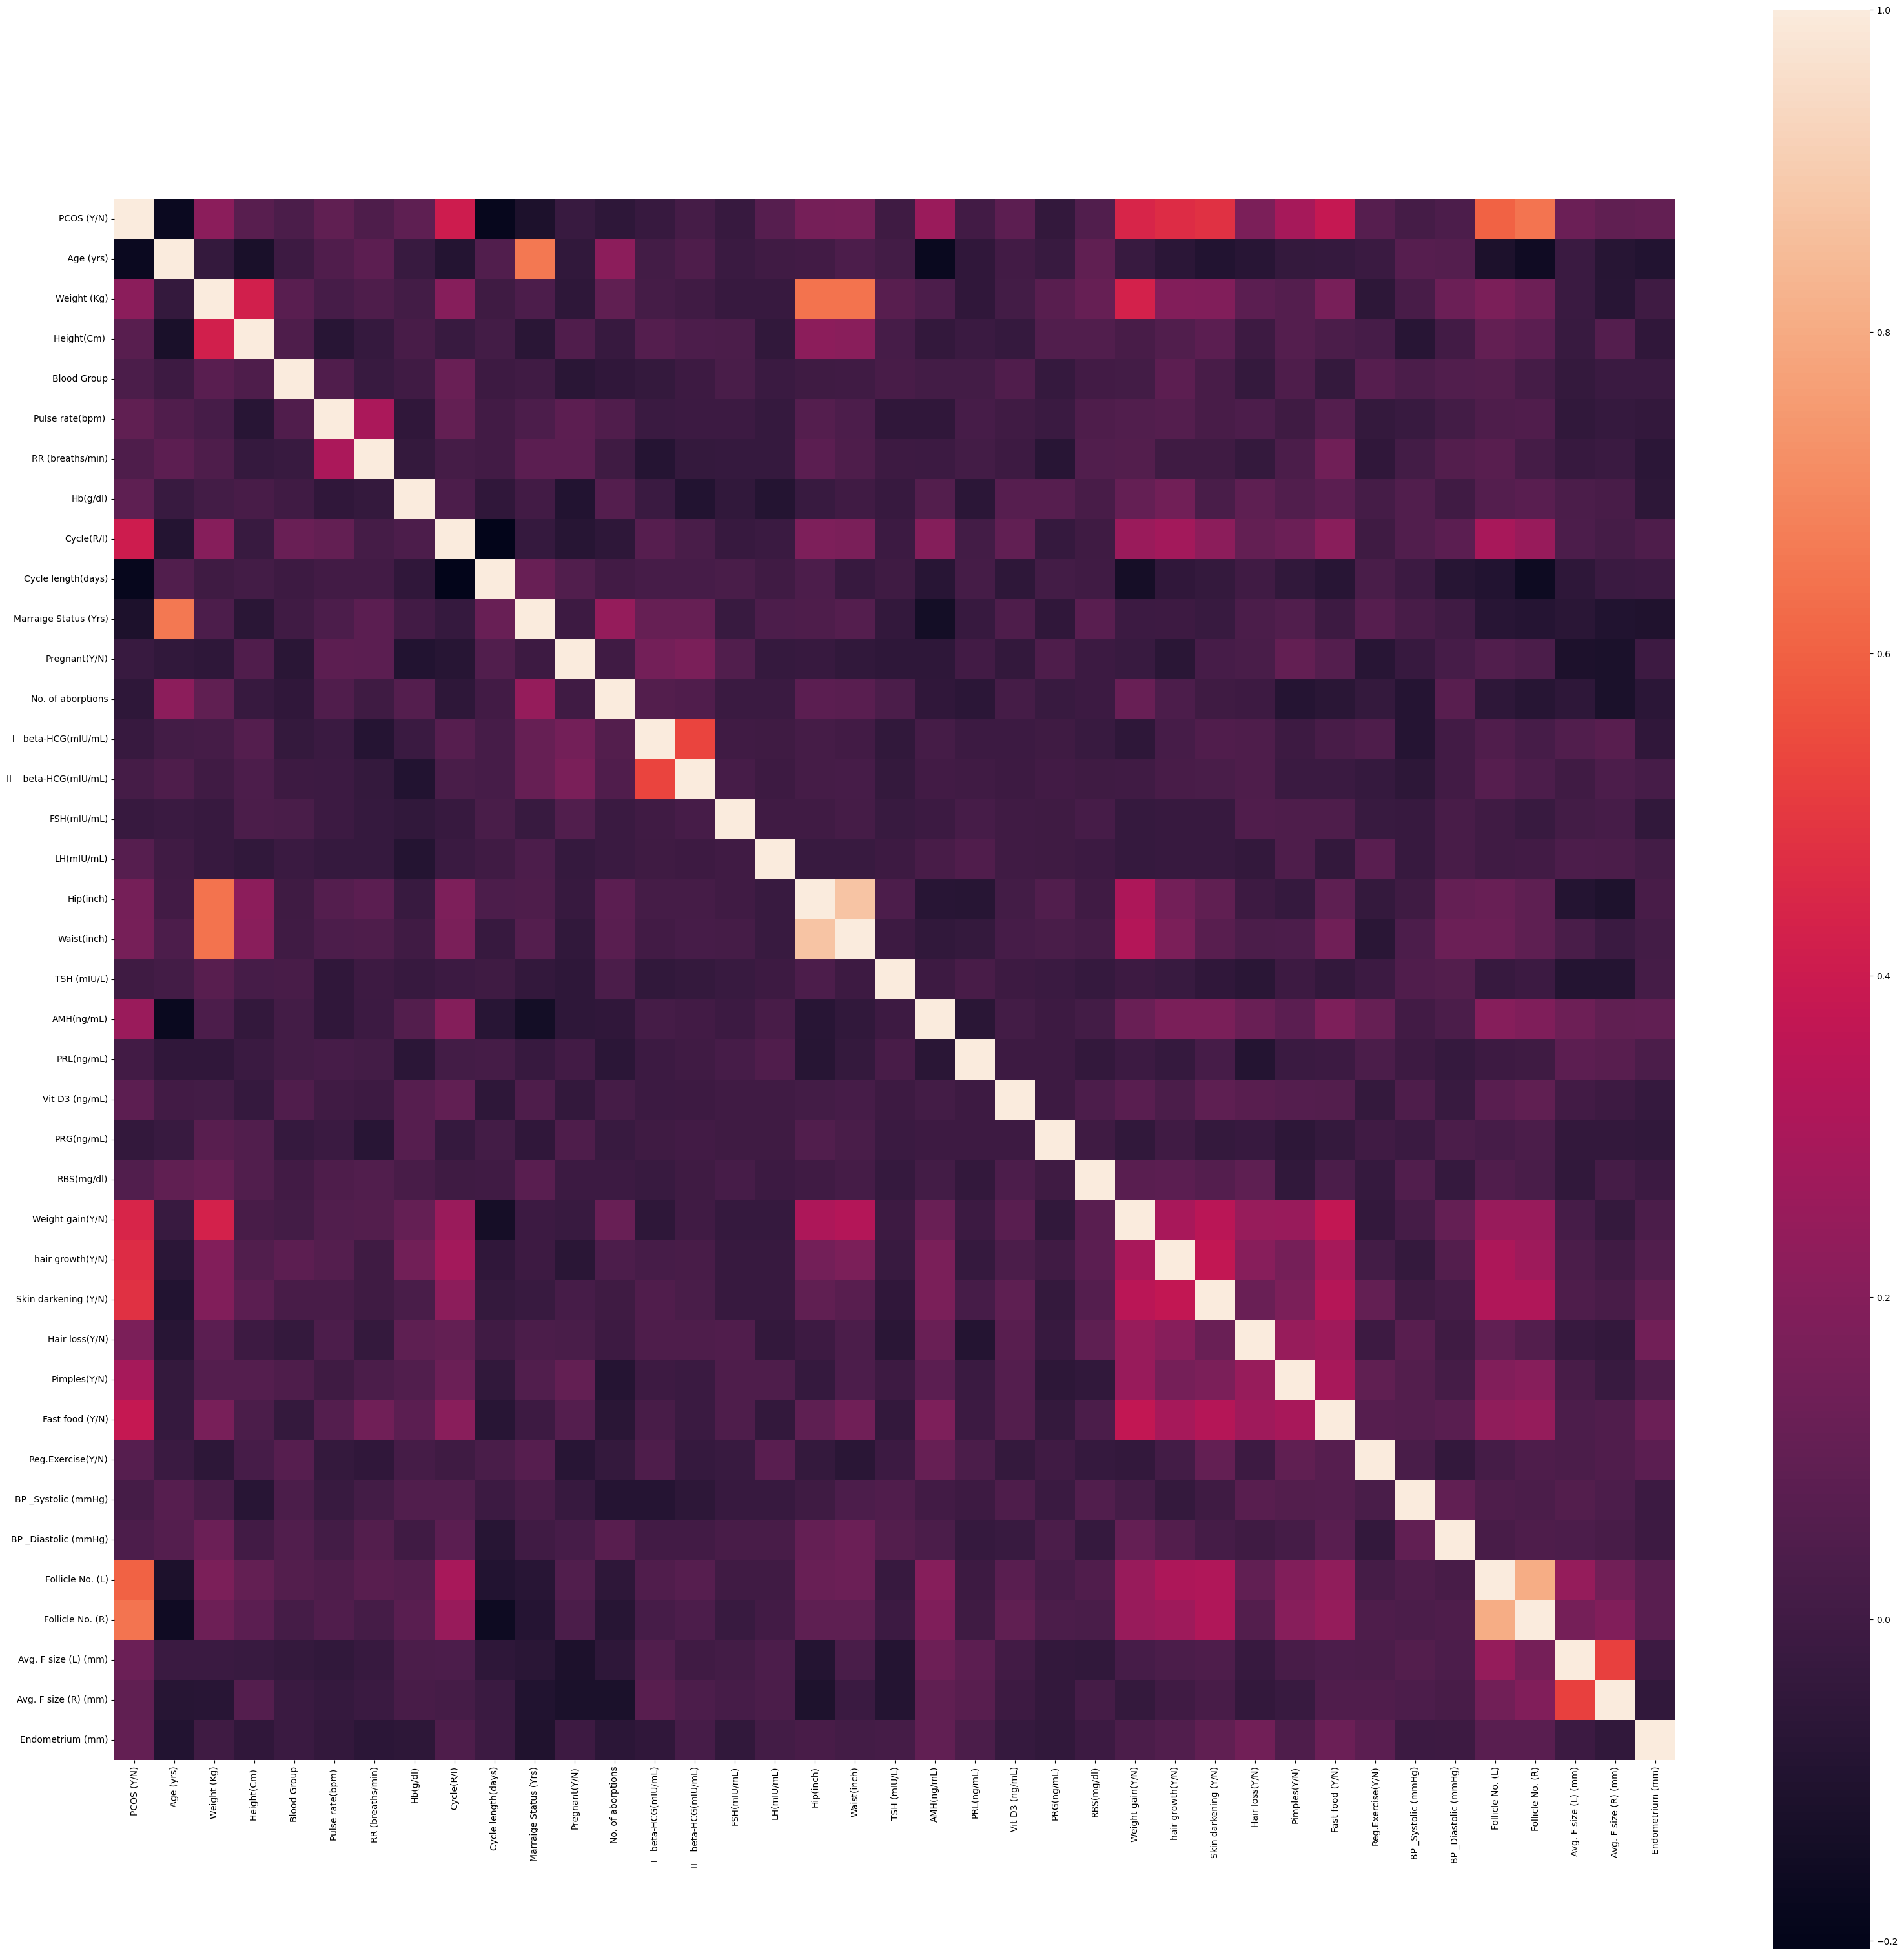

In [ ]:
corrmat = data.drop(columns=['Sl. No', 'Patient File No.']).corr()
plt.subplots(figsize=(39,39))
sns.heatmap(corrmat,square=True);

In [ ]:
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

,PCOS (Y/N)
PCOS (Y/N),1.000000
Follicle No. (R),0.649591
Follicle No. (L),0.600376
Skin darkening (Y/N),0.479234
hair growth(Y/N),0.464201
Weight gain(Y/N),0.441193
Cycle(R/I),0.404407
Fast food (Y/N),0.379460
Pimples(Y/N),0.293782
AMH(ng/mL),0.259442


Notes:

Decision tree is an algorithm that splits (splitting) the entire data (root node) into subnodes and further until we reach terminal/leaf nodes based on their traits (ie: is age >10?). When we remove a subnode, it is called pruning (prevent overfitting). To find how to split the data, the algorithm iterates through all possible ways of splitting, and select the splitting which has the largest information gain. Stop splitting when no more decision or impurity=0.

information gain = impurity of parent - (weight * child__1_impurity + weight * child_2_impurity).

gini impurity is calculated for each subgroup (lower the more pure)

In [ ]:
#split data into training and testing
corr = data.corr(numeric_only=True)["PCOS (Y/N)"]
weak_features = corr[abs(corr) < 0.1].index.tolist()
predictors_and_target = data.drop(columns=weak_features)

train, test = train_test_split(predictors_and_target, test_size=0.2, random_state=42, stratify=data['PCOS (Y/N)'])
trainX = train.drop(columns='PCOS (Y/N)')
trainY = train['PCOS (Y/N)']

testX = test.drop(columns='PCOS (Y/N)')
testY = test['PCOS (Y/N)']

In [ ]:
#scale data
scaler = StandardScaler()
trainX_scaled = scaler.fit_transform(trainX)
testX_scaled = scaler.transform(testX)

In [ ]:
#define model
model = DecisionTreeClassifier(max_depth = 5, random_state=42)

#fit model
model.fit(trainX_scaled, trainY)

DecisionTreeClassifier(max_depth=5, random_state=42)

Parameters for DecisionTree:

criterion: 'gini' is the default, determines how a best split is defined

max_depth: maximum depth of split, default is leaf node

min_samples_split: the minimum number of data required to split

min_samples_leaf: the minimum number of data required to split at a leaf node

random_state

class_weight: weights of classes: 'balanced', default none, or defined for each class

[Text(0.5608108108108109, 0.9166666666666666, 'x[15] <= 0.449\ngini = 0.44\nsamples = 429\nvalue = [289, 140]'),
 Text(0.2905405405405405, 0.75, 'x[9] <= 0.517\ngini = 0.214\nsamples = 295\nvalue = [259, 36]'),
 Text(0.42567567567567566, 0.8333333333333333, 'True  '),
 Text(0.14864864864864866, 0.5833333333333334, 'x[2] <= 0.511\ngini = 0.103\nsamples = 239\nvalue = [226, 13]'),
 Text(0.08108108108108109, 0.4166666666666667, 'x[14] <= 1.336\ngini = 0.039\nsamples = 201\nvalue = [197, 4]'),
 Text(0.05405405405405406, 0.25, 'x[1] <= 1.899\ngini = 0.03\nsamples = 200\nvalue = [197, 3]'),
 Text(0.02702702702702703, 0.08333333333333333, 'gini = 0.01\nsamples = 195\nvalue = [194, 1]'),
 Text(0.08108108108108109, 0.08333333333333333, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.10810810810810811, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21621621621621623, 0.4166666666666667, 'x[8] <= 0.283\ngini = 0.361\nsamples = 38\nvalue = [29, 9]'),
 Text(0.16216216216216217, 0.25

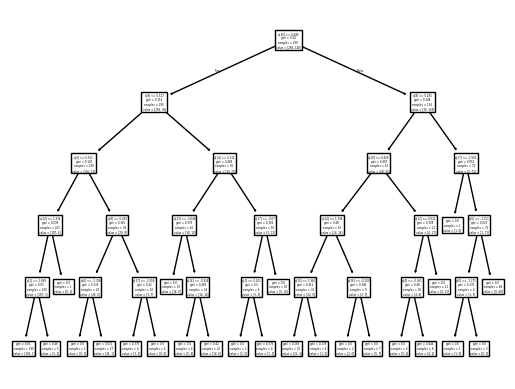

In [ ]:
#plot the tree

from sklearn import tree
tree.plot_tree(model)

In [ ]:
#Model prediction evaluation

predY = model.predict(testX_scaled)

accuracy = accuracy_score(testY, predY)
print(f"Model Accuracy:")
print(accuracy, "\n")

conf_matrix = confusion_matrix(testY, predY)
print("Confusion Matrix:")
print(conf_matrix, "\n")

class_report = classification_report(testY, predY)
print("\nClassification Report:")
print(class_report, "\n")

Model Accuracy:
0.8240740740740741 

Confusion Matrix:
[[65  8]
 [11 24]] 


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87        73
         1.0       0.75      0.69      0.72        35

    accuracy                           0.82       108
   macro avg       0.80      0.79      0.79       108
weighted avg       0.82      0.82      0.82       108
 



Notes:

However, decision tree is prone to overfitting or bias. Thus, we can use randome forest model to overcome this issue.

In [ ]:
#Setting up random forest model

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(trainX_scaled, trainY)

RandomForestClassifier(random_state=42)

Parameters for RandomForestClassifier:

n_estimator: number of trees

criterion: 'gini' is the default, determines how a best split is defined

max_depth: maximum depth of split, default is leaf node

min_samples_split: the minimum number of data required to split

min_samples_leaf: the minimum number of data required to split at a leaf node

random_state

class_weight: weights of classes: 'balanced', default none, or defined for each class



In [ ]:
#Model prediction evaluation

predY = model.predict(testX_scaled)

accuracy = accuracy_score(testY, predY)
print(f"Model Accuracy:")
print(accuracy, "\n")

conf_matrix = confusion_matrix(testY, predY)
print("Confusion Matrix:")
print(conf_matrix, "\n")

class_report = classification_report(testY, predY)
print("\nClassification Report:")
print(class_report, "\n")

Model Accuracy:
0.8796296296296297 

Confusion Matrix:
[[67  6]
 [ 7 28]] 


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91        73
         1.0       0.82      0.80      0.81        35

    accuracy                           0.88       108
   macro avg       0.86      0.86      0.86       108
weighted avg       0.88      0.88      0.88       108
 

